In [1]:
""""

Model of Bertrand Duopoly / Modelo de Duopólio de Bertrand

Author / Autor: imoripaolo

Based of / Baseado em: Tadelis, sec 5.2.4

"""""

import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
""""
Bertrand Duopoly: two symmetric firms with some market power maximize profits choosing price.

Duopólio de Bertrand: duas firmas simétricas com algum poder de mercado maximizam lucros escolhendo 
preço.

Cost / Custo: c_j(q_j) = 10q_j for j = 1,2

Market Demand / Demanda de Mercado: p = 100 - q

Market Supply / Oferta de Mercado: q = q_1 + q_2

------

Demand for firm j=1,2 depends on whose price is lower:  

Demanda para firma j=1,2 depende de qual preço é menor:

q_j = 1_{p_j < p_i}[100 - p_j] + 1_{p_j = p_i}[(100 - p_j)/2] + 1_{p_j > p_i}[0] 

Profit for firm j=1,2 / Lucro para a firma j=1,2:

pi_j = 1_{p_j < p_i}[(100 - p_j)(p_j-10)] + 1_{p_j = p_i}[(100 - p_j)(p_j-10)/2] + 1_{p_j > p_i}[0]

"""""
c=10

def BR_bertrand(pi,pj):
    if pi > c:
        if pi < pj:
            p = pi
        elif pi == pj:
            p = pi - 1
        else:
            p = pi - ((pi+pj)/4)
    else:
        p = c
    return p


def profit(pi,pj):
    if pi < pj:
        profit = (100-pi)*(pi-c)
    elif pi == pj:
        profit = (100-pi)*(pi-c)/2
    else:
        profit=0
    return profit   

In [5]:
""""
We won't calculate a Nash Equilibrium (NE) right now. We'll simply choose arbitrary initial prices
for each firm and see how they decide to change their prices based on their best responses and
what happened previously. We also want to see what happens to profits as time goes on.

---

Não vamos calcular um Equilíbrio de Nash (EN) no momento. Vamos simplesmente escolher preços iniciais
arbitrários para cada firma e ver como elas mudam seus preços com base em suas melhores
respostas e no que aconteceu anteriormente. Também queremos ver o que ocorre com lucros
conforme o tempo progride.

"""""

T = 10
p1, p2, pi1, pi2 = np.zeros(T), np.zeros(T), np.zeros(T), np.zeros(T)
p1[0], p2[0] = 50, 40
pi1[0] = profit(p1[0], p2[0])
pi2[0] = profit(p2[0], p1[0])

print("O lucro da firma é pi_1=", pi1[0], "e o lucro da firma 2 é pi_2=", pi2[0])

O lucro da firma é pi_1= 0.0 e o lucro da firma 2 é pi_2= 1800.0


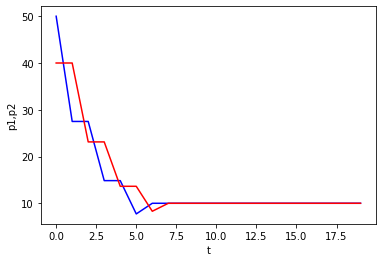

In [6]:
""""
Now, we see how firms update their actions on each period and plot the evolution of prices

---

Agora, vamos ver como as firmas atualizam suas ações em cada período e plotar a evolução dos preços

"""""

for t in range(1,T):
    p1[t], p2[t] = BR_bertrand(p1[t-1], p2[t-1]), BR_bertrand(p2[t-1], p1[t-1])
    pi1[t] = profit(p1[t], p2[t])
    pi2[t] = profit(p2[t], p1[t])
    
fig, ax = plt.subplots()
ax.plot(p1,'b')
ax.plot(p2,'r')
ax.set_ylabel('p1,p2')
ax.set_xlabel('t')
plt.show()